/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Average Metrics Across All Folds:
Precision: 0.5086
Recall: 0.4560
F1_score: 0.4556
Accuracy: 0.4560


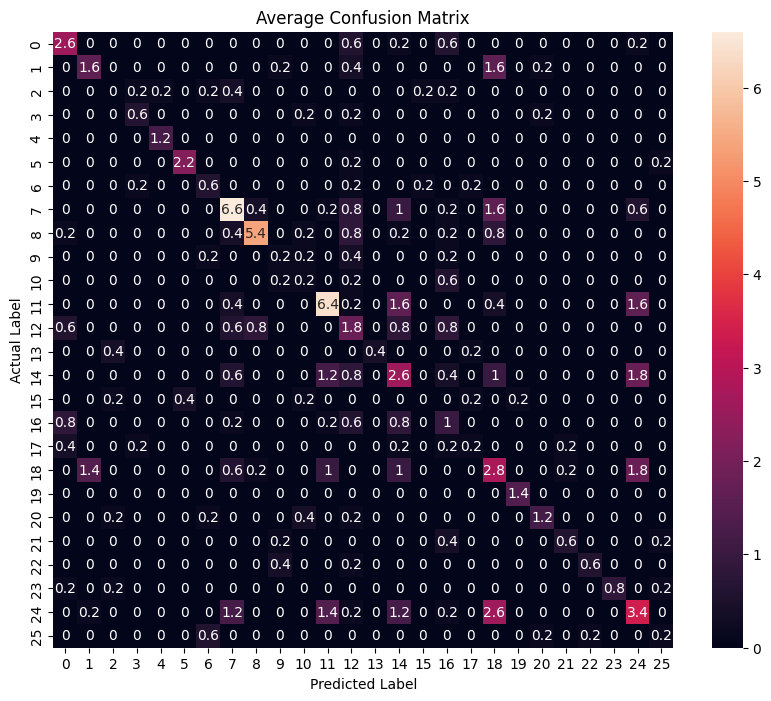

Question: আপনি কেমন আছেন?
1/1 [==============================] - 0s 33ms/step
Chatbot's Response: আমি খুব ভালো, আপনি কেমন আছেন? 


In [ ]:
#LSTM

#Importing various libraries
import json
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
with open('BanglaHealthcareChatbotData.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Prepare data for training
training_sentences = []
training_labels = []
labels = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Tokenizing and padding
vocab_size = 1000
max_len = 20
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Label encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(training_labels)
num_classes = len(le.classes_)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
avg_scores = []
conf_matrices = np.zeros((num_classes, num_classes))  # Initialize a zero matrix
metrics = {
    "precision": [],
    "recall": [],
    "f1_score": [],
    "accuracy": []
}

for train, test in kfold.split(padded_sequences, encoded_labels):
    # Building the model
    model = Sequential()
    model.add(Embedding(vocab_size, 16, input_length=max_len))
    model.add(LSTM(32))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    model.fit(padded_sequences[train], encoded_labels[train], epochs=200, verbose=0)

    # Predictions and Confusion Matrix
    test_predictions = model.predict(padded_sequences[test], verbose=0)
    test_predictions = np.argmax(test_predictions, axis=1)
    conf_matrix = confusion_matrix(encoded_labels[test], test_predictions, labels=range(num_classes))
    conf_matrices += conf_matrix  # Accumulate confusion matrix

    # Calculating metrics
    precision = precision_score(encoded_labels[test], test_predictions, average='weighted')
    recall = recall_score(encoded_labels[test], test_predictions, average='weighted')
    f1 = f1_score(encoded_labels[test], test_predictions, average='weighted')
    accuracy = accuracy_score(encoded_labels[test], test_predictions)

    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)
    metrics["accuracy"].append(accuracy)

# Average metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Average confusion matrix
avg_conf_matrix = conf_matrices / 5  # Divide by number of folds

# Displaying average evaluation metrics
print("Average Metrics Across All Folds:")
for metric, value in avg_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plotting the average confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='g')
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Question-Answering Simulation
def chatbot_response(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    intent_index = np.argmax(prediction)
    intent = le.inverse_transform([intent_index])[0]
    return np.random.choice(responses[intent])

# Example
question = "আপনি কেমন আছেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "তুমি কি জানো যে এখন কটা বাজে?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "আমি অসুস্থ বোধ করছি। আপনি কি আমাকে সাহায্য করবেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Average Metrics Across All Folds:
Precision: 0.4484
Recall: 0.4172
F1_score: 0.4062
Accuracy: 0.4172


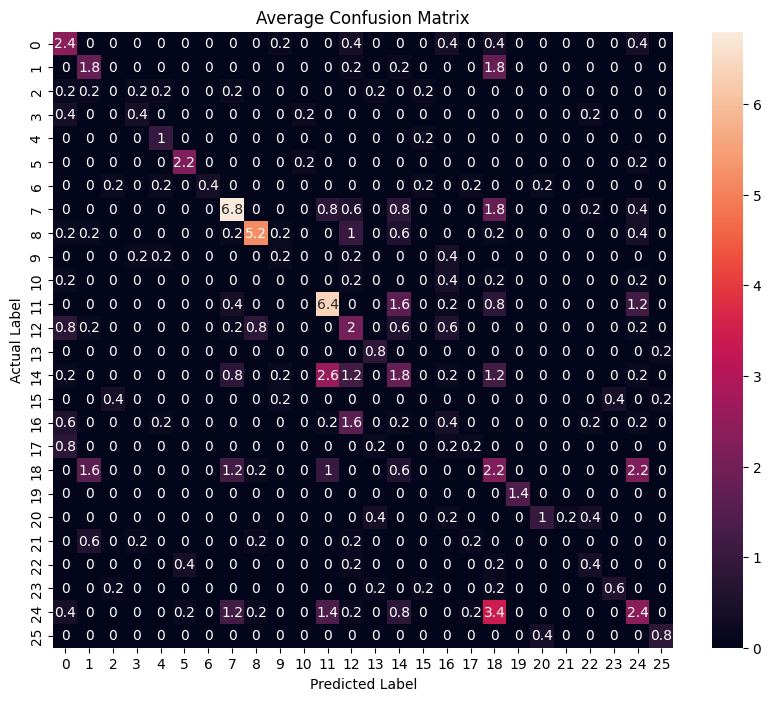

Question: আপনি কেমন আছেন?
1/1 [==============================] - 0s 25ms/step
Chatbot's Response: হ্যালো, আমি ভাল আছি আপনাকে ধন্যবাদ


In [ ]:
#GRU

import json
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
with open('BanglaHealthcareChatbotData.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Prepare data for training
training_sentences = []
training_labels = []
labels = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Tokenizing and padding
vocab_size = 1000
max_len = 20
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Label encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(training_labels)
num_classes = len(le.classes_)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
avg_scores = []
conf_matrices = np.zeros((num_classes, num_classes))  # Initialize a zero matrix
metrics = {
    "precision": [],
    "recall": [],
    "f1_score": [],
    "accuracy": []
}

for train, test in kfold.split(padded_sequences, encoded_labels):
    # Building the model
    model = Sequential()
    model.add(Embedding(vocab_size, 16, input_length=max_len))
    model.add(GRU(32))  # Using GRU layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    model.fit(padded_sequences[train], encoded_labels[train], epochs=200, verbose=0)

    # Predictions and Confusion Matrix
    test_predictions = model.predict(padded_sequences[test], verbose=0)
    test_predictions = np.argmax(test_predictions, axis=1)
    conf_matrix = confusion_matrix(encoded_labels[test], test_predictions, labels=range(num_classes))
    conf_matrices += conf_matrix  # Accumulate confusion matrix

    # Calculating metrics
    precision = precision_score(encoded_labels[test], test_predictions, average='weighted')
    recall = recall_score(encoded_labels[test], test_predictions, average='weighted')
    f1 = f1_score(encoded_labels[test], test_predictions, average='weighted')
    accuracy = accuracy_score(encoded_labels[test], test_predictions)

    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)
    metrics["accuracy"].append(accuracy)

# Average metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Average confusion matrix
avg_conf_matrix = conf_matrices / 5  # Divide by number of folds

# Displaying average evaluation metrics
print("Average Metrics Across All Folds:")
for metric, value in avg_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plotting the average confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='g')
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Question-Answering Simulation
def chatbot_response(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    intent_index = np.argmax(prediction)
    intent = le.inverse_transform([intent_index])[0]
    return np.random.choice(responses[intent])

# Example
question = "আপনি কেমন আছেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Average Metrics Across All Folds:
Precision: 0.4518
Recall: 0.4049
F1_score: 0.4043
Accuracy: 0.4049


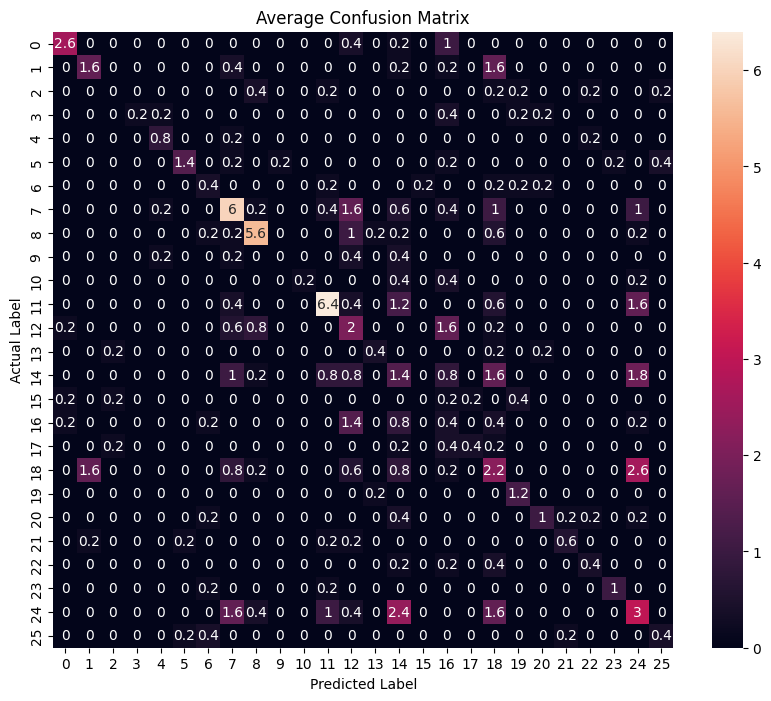

Question: আপনি কেমন আছেন?
1/1 [==============================] - 0s 51ms/step
Chatbot's Response: হ্যালো, আপনি কেমন আছেন? আমি ভালো 


In [ ]:
#Simple RNN

import json
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
with open('BanglaHealthcareChatbotData.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Prepare data for training
training_sentences = []
training_labels = []
labels = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Tokenizing and padding
vocab_size = 1000
max_len = 20
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Label encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(training_labels)
num_classes = len(le.classes_)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
avg_scores = []
conf_matrices = np.zeros((num_classes, num_classes))  # Initialize a zero matrix
metrics = {
    "precision": [],
    "recall": [],
    "f1_score": [],
    "accuracy": []
}

for train, test in kfold.split(padded_sequences, encoded_labels):
    # Building the model
    model = Sequential()
    model.add(Embedding(vocab_size, 16, input_length=max_len))
    model.add(SimpleRNN(32))  # Using SimpleRNN layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    model.fit(padded_sequences[train], encoded_labels[train], epochs=200, verbose=0)

    # Predictions and Confusion Matrix
    test_predictions = model.predict(padded_sequences[test], verbose=0)
    test_predictions = np.argmax(test_predictions, axis=1)
    conf_matrix = confusion_matrix(encoded_labels[test], test_predictions, labels=range(num_classes))
    conf_matrices += conf_matrix  # Accumulate confusion matrix

    # Calculating metrics
    precision = precision_score(encoded_labels[test], test_predictions, average='weighted')
    recall = recall_score(encoded_labels[test], test_predictions, average='weighted')
    f1 = f1_score(encoded_labels[test], test_predictions, average='weighted')
    accuracy = accuracy_score(encoded_labels[test], test_predictions)

    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)
    metrics["accuracy"].append(accuracy)

# Average metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Average confusion matrix
avg_conf_matrix = conf_matrices / 5  # Divide by number of folds

# Displaying average evaluation metrics
print("Average Metrics Across All Folds:")
for metric, value in avg_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plotting the average confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='g')
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Question-Answering Simulation
def chatbot_response(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    intent_index = np.argmax(prediction)
    intent = le.inverse_transform([intent_index])[0]
    return np.random.choice(responses[intent])

# Example
question = "আপনি কেমন আছেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Average Metrics Across All Folds:
Precision: 0.4832
Recall: 0.4438
F1_score: 0.4405
Accuracy: 0.4438


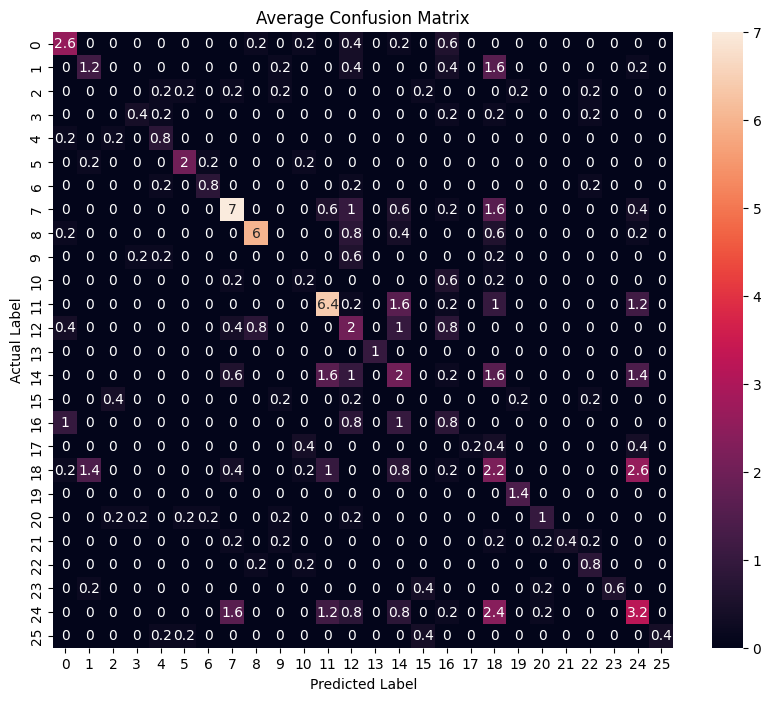

Question: আপনি কেমন আছেন?
1/1 [==============================] - 0s 25ms/step
Chatbot's Response: হাই, আমি ভাল আছি আপনাকে ধন্যবাদ, কেমন আছেন?
Question: তুমি কি জানো যে এখন কটা বাজে?
1/1 [==============================] - 0s 22ms/step
Chatbot's Response: একটু অপেক্ষা করুন।
Question: আমি অসুস্থ বোধ করছি। আপনি কি আমাকে সাহায্য করবেন?
1/1 [==============================] - 0s 21ms/step
Chatbot's Response: আমি কি জানতে পারি আপনার কী কী সমস্যা?
Question: নির্দিষ্ট সময় পরপর কাঁপুনি দিয়ে জ্বর আসছে
1/1 [==============================] - 0s 29ms/step
Chatbot's Response: আপনার ম্যালেরিয়াতে আক্রান্ত হওয়ার সম্ভাবনা আছে।


In [ ]:
#LSTM

#Importing various libraries
import json
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
with open('BanglaHealthcareChatbotData.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Prepare data for training
training_sentences = []
training_labels = []
labels = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Tokenizing and padding
vocab_size = 1000
max_len = 20
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Label encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(training_labels)
num_classes = len(le.classes_)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
avg_scores = []
conf_matrices = np.zeros((num_classes, num_classes))  # Initialize a zero matrix
metrics = {
    "precision": [],
    "recall": [],
    "f1_score": [],
    "accuracy": []
}

for train, test in kfold.split(padded_sequences, encoded_labels):
    # Building the model
    model = Sequential()
    model.add(Embedding(vocab_size, 16, input_length=max_len))
    model.add(LSTM(32))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    model.fit(padded_sequences[train], encoded_labels[train], epochs=200, verbose=0)

    # Predictions and Confusion Matrix
    test_predictions = model.predict(padded_sequences[test], verbose=0)
    test_predictions = np.argmax(test_predictions, axis=1)
    conf_matrix = confusion_matrix(encoded_labels[test], test_predictions, labels=range(num_classes))
    conf_matrices += conf_matrix  # Accumulate confusion matrix

    # Calculating metrics
    precision = precision_score(encoded_labels[test], test_predictions, average='weighted')
    recall = recall_score(encoded_labels[test], test_predictions, average='weighted')
    f1 = f1_score(encoded_labels[test], test_predictions, average='weighted')
    accuracy = accuracy_score(encoded_labels[test], test_predictions)

    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)
    metrics["accuracy"].append(accuracy)

# Average metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Average confusion matrix
avg_conf_matrix = conf_matrices / 5  # Divide by number of folds

# Displaying average evaluation metrics
print("Average Metrics Across All Folds:")
for metric, value in avg_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plotting the average confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='g')
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Question-Answering Simulation
def chatbot_response(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    intent_index = np.argmax(prediction)
    intent = le.inverse_transform([intent_index])[0]
    return np.random.choice(responses[intent])

# Example
question = "আপনি কেমন আছেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "তুমি কি জানো যে এখন কটা বাজে?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "আমি অসুস্থ বোধ করছি। আপনি কি আমাকে সাহায্য করবেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "নির্দিষ্ট সময় পরপর কাঁপুনি দিয়ে জ্বর আসছে"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Average Metrics Across All Folds:
Precision: 0.3953
Recall: 0.3640
F1_score: 0.3590
Accuracy: 0.3640


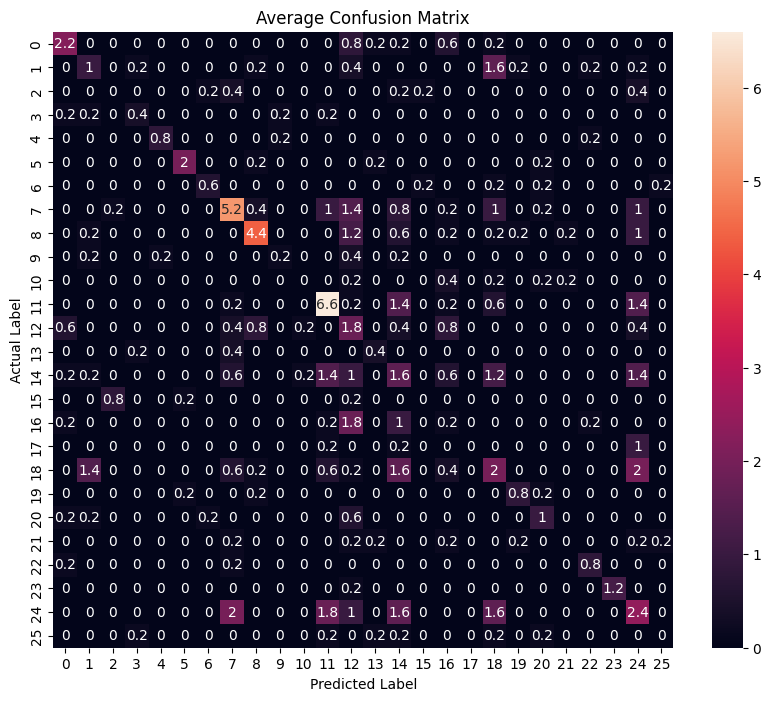

Question: আপনি কেমন আছেন?
1/1 [==============================] - 0s 25ms/step
Chatbot's Response: হ্যালো, আমি ভাল আছি আপনাকে ধন্যবাদ
Question: খাবার খেতে ইচ্ছে করছে না
1/1 [==============================] - 0s 23ms/step
Chatbot's Response: আপনার হেপাটাইটিসে আক্রান্ত হওয়ার সম্ভাবনা আছে।
Question: শ্বাস নেওয়ার সময় গড় গড় শব্দ হয়
1/1 [==============================] - 0s 26ms/step
Chatbot's Response: আপনার নিউমোনিয়াতে আক্রান্ত হওয়ার সম্ভাবনা আছে ।
Question: চোখ থেকে জল পড়ছে
1/1 [==============================] - 0s 25ms/step
Chatbot's Response: আপনি এলার্জি জনিত সমস্যা দেখা দিয়েছে । 
Question: ঘনঘন প্রস্রাব হচ্ছে
1/1 [==============================] - 0s 25ms/step
Chatbot's Response: আপনার ডায়াবেটিস হওয়ার সম্ভাবনা আছে। আপনি ডায়াবেটিসের পরীক্ষা  করান। 


In [ ]:
#Bidirectional RNN
import json
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
with open('BanglaHealthcareChatbotData.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Prepare data for training
training_sentences = []
training_labels = []
labels = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Tokenizing and padding
vocab_size = 1000
max_len = 20
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Label encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(training_labels)
num_classes = len(le.classes_)

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
conf_matrices = np.zeros((num_classes, num_classes))  # Initialize a zero matrix
metrics = {
    "precision": [],
    "recall": [],
    "f1_score": [],
    "accuracy": []
}

for train, test in kfold.split(padded_sequences, encoded_labels):
    # Building the model
    model = Sequential()
    model.add(Embedding(vocab_size, 16, input_length=max_len))
    model.add(Bidirectional(SimpleRNN(32)))  # Using Bidirectional SimpleRNN
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    model.fit(padded_sequences[train], encoded_labels[train], epochs=350, verbose=0)

    # Predictions and Confusion Matrix
    test_predictions = model.predict(padded_sequences[test], verbose=0)
    test_predictions = np.argmax(test_predictions, axis=1)
    conf_matrix = confusion_matrix(encoded_labels[test], test_predictions, labels=range(num_classes))
    conf_matrices += conf_matrix  # Accumulate confusion matrix

    # Calculating metrics
    precision = precision_score(encoded_labels[test], test_predictions, average='weighted')
    recall = recall_score(encoded_labels[test], test_predictions, average='weighted')
    f1 = f1_score(encoded_labels[test], test_predictions, average='weighted')
    accuracy = accuracy_score(encoded_labels[test], test_predictions)

    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)
    metrics["accuracy"].append(accuracy)

# Average metrics
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Average confusion matrix
avg_conf_matrix = conf_matrices / 5  # Divide by number of folds

# Displaying average evaluation metrics
print("Average Metrics Across All Folds:")
for metric, value in avg_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plotting the average confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(avg_conf_matrix, annot=True, fmt='g')
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Question-Answering Simulation
def chatbot_response(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    intent_index = np.argmax(prediction)
    intent = le.inverse_transform([intent_index])[0]
    return np.random.choice(responses[intent])

# Example
question = "আপনি কেমন আছেন?"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "খাবার খেতে ইচ্ছে করছে না"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))

question = "শ্বাস নেওয়ার সময় গড় গড় শব্দ হয়"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))

question = "চোখ থেকে জল পড়ছে"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))


question = "ঘনঘন প্রস্রাব হচ্ছে"  # Sample question in Bengali
print("Question:", question)
print("Chatbot's Response:", chatbot_response(question))
